## In this example we’ll use the logistic regression code to demonstrate how Tensorflow computes gradients.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from IPython import display

plt.style.use('ggplot')

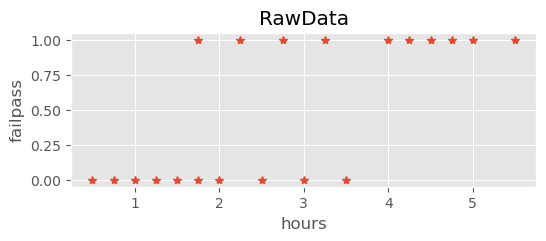

In [2]:
# Enter data in mympy array
hours= np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,
2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
failpass=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
                   
# Plot the data
plt.figure(figsize=(6,2))
plt.plot(hours, failpass,'*') 
plt.xlabel('hours') 
plt.ylabel('failpass') 
plt.title("RawData") 
plt.show() 

In [3]:
# create constant for the intercept parameter. We will fix the intercept to the
# maximum likelihood estimate so our model only has a single parameter to vary
b0 = tf.constant(-4.0769134,dtype=tf.float64)

2023-05-29 11:02:37.056823: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 11:02:37.800349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14626 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [4]:
# create functions for predicted probability of passing and the prediction error
def logistic_model(X, b1):
    return tf.sigmoid(tf.add(tf.multiply(X, b1), b0))
def loss(y, y_pred):
    return -tf.reduce_sum(y*tf.math.log(y_pred)) \
    -tf.reduce_sum((1.0-y)*tf.math.log(1.0-y_pred))


In [5]:
# computing the loss and the gradient of the loss w.r.t. b
def loss_gradient(x, y, b1):
    with tf.GradientTape() as tape:
        # as b1 is a tensor that we pass into the function we
        # have to make sure that it is being 'watched' and
        # will be included in the gradient tape calculations
        tape.watch(b1)
        # we now run the operations for the logistic model
        y_pred = logistic_model(x, b1)
        current_loss = loss(y, y_pred)
        plt.plot(loss, b1,'*')
        
    # now use the tape to get the derivative with automatic differentiation
    gradient = tape.gradient(current_loss, b1)
    return current_loss, gradient


Before we look at the gradients of the loss function, we’ll plot the value of the loss itself as a function of
the slope parameter b1

<!-- b1 = tf.Variable(1.0, dtype=tf.float64)
loss_gradient(hours, failpass, b1) -->

### Next, we’ll look at the gradient of the loss function at different values of the parameter b1 by computing the gradient using two methods

Finite difference approximation

TypeError: float() argument must be a string or a number, not 'function'

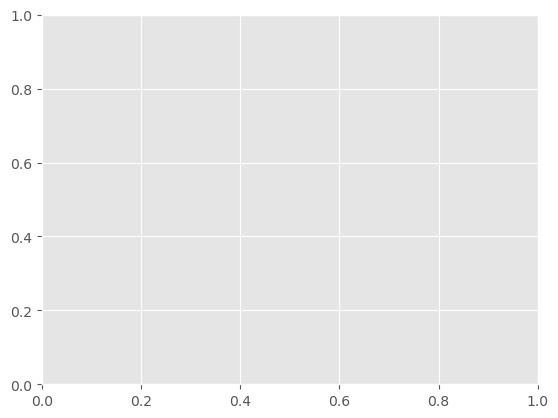

In [8]:
# set up some arrays to store the output
bvals = np.arange(0.1,2.5,0.1)
finite_grads = np.zeros_like(bvals)
autodiff_grads = np.zeros_like(bvals)
# set a difference for the finite difference scheme
# we will use a large step size first
db = 1.0
for i in range(len(bvals)):
    # convert the numpy value to a tensorflow variable
    b1 = tf.convert_to_tensor(bvals[i], tf.float64)
    # compute the loss value either side of b
    bp_loss, _ = loss_gradient(hours, failpass, b1+db)
    bm_loss, _ = loss_gradient(hours, failpass, b1-db)
    
    #compute the gradient with finite difference
    fd_grad=(bp_loss - bm_loss)/(2*db)
    
    #compute the gradient with AD
    _, ad_grad = loss_gradient(hours, failpass, b1)
    
    # store the results
    finite_grads[i]=fd_grad
    autodiff_grads[i]=ad_grad